In [2]:
import os
import sys
import numpy as np
import pandas as pd
import sklearn

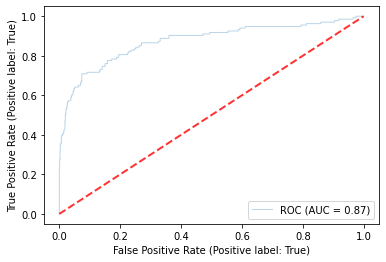

In [34]:
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC


df = pd.read_csv("./../../data/bigml_59c28831336c6604c800002a.csv", encoding="utf-8")
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)

X_train = train_df.drop(columns=["churn"])
X_test = test_df.drop(columns=["churn"])

y_train = train_df["churn"]
y_test = test_df["churn"]


str_list = ["state", "phone number", "international plan", "voice mail plan",]
int_list = ["account length", "area code", "number vmail messages", "total day calls", "total eve calls", "total night calls", "total intl calls", "customer service calls",]
float_list = ["total day minutes","total day charge","total eve minutes","total eve charge","total night minutes","total night charge","total intl minutes","total intl charge",]

drop_features = ["phone number"]
numeric_features = int_list + float_list
numeric_features = [x for x in numeric_features if x != "area code"]
binary_features = ["international plan", "voice mail plan"]
categorical_features = ['area code', 'state']

prepocessor = make_column_transformer(
    ('drop', drop_features),
    (StandardScaler(), numeric_features),
    (OneHotEncoder(handle_unknown='ignore', sparse=False), categorical_features),
    (OneHotEncoder(handle_unknown='ignore', sparse=False, drop='if_binary'), binary_features),
)


from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()

_svcb = make_pipeline(prepocessor, SVC(class_weight='balanced', C=100, gamma=0.01, probability=True))
_svcb.fit(X_train, y_train)
predictions = _svcb.predict(X_test)
predictions_proba = _svcb.predict_proba(X_test)

viz = RocCurveDisplay.from_estimator(
    _svcb,
    X_test,
    y_test,
    name="ROC",
    alpha=0.3,
    lw=1,
    ax=ax,
)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)


In [44]:
predictions

array([ True, False, False, False, False,  True, False, False, False,
       False,  True,  True, False, False,  True, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True,  True, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True,  True, False, False, False, False,  True,
       False, False,

array([6.98864217e-01, 6.37780881e-02, 2.50477334e-02, 1.22527060e-02,
       2.31988578e-01, 3.42310242e-01, 2.16323514e-01, 1.81294342e-02,
       1.57684681e-01, 1.00223325e-01, 7.87161617e-01, 5.53741439e-01,
       1.53674624e-01, 1.36482538e-01, 6.46518317e-01, 1.56148685e-01,
       9.88067977e-02, 5.84180295e-01, 8.56758663e-02, 7.40099532e-02,
       9.35154883e-02, 3.09435698e-02, 2.85450093e-02, 1.06323314e-01,
       2.65869194e-01, 2.10431331e-03, 1.70043958e-01, 3.27718249e-02,
       2.02380602e-01, 2.43700460e-01, 5.83742105e-02, 1.53187917e-02,
       2.97324383e-01, 1.64756306e-02, 5.11192787e-02, 1.16107858e-01,
       2.79744447e-02, 9.51780877e-04, 2.07737763e-02, 6.11096931e-02,
       2.30976742e-01, 5.99045805e-02, 6.14152225e-02, 3.07117021e-02,
       6.72264183e-03, 6.23201158e-02, 5.54365586e-02, 6.09790499e-02,
       7.31008856e-02, 4.16335411e-02, 2.19365147e-02, 2.52041315e-02,
       6.53270722e-02, 4.23419916e-02, 5.63399513e-02, 2.47820338e-02,
      

In [8]:
sklearn.metrics.roc_auc_score(y_test, predictions)

0.8137947675019821

(1000,) (1000,)
0.5287026406429393


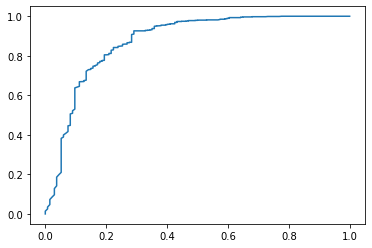

In [78]:
def roc_auc(y_true, y_score):
    
    pass

y_true = y_test.astype(int)
y_score = predictions_proba[:, 1]
print(y_true.shape, y_score.shape)

xs, ys, auc = [], [], 0

ths = np.linspace(0, 1, 1001)
for th in ths:
    y_score_tmp = np.where(y_score<=th, 1, 0)
    tpr = ((y_true == 1) & (y_score_tmp == 1)).sum() / (y_true == 1).sum()
    fpr = ((y_true == 0) & (y_score_tmp == 1)).sum() / (y_true == 0).sum()
    
    ys.append(tpr)
    xs.append(fpr)

auc = np.mean(ys)
print(auc)
fig, ax = plt.subplots()
ax.plot(ys, xs)


In [79]:
ys

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.007462686567164179,
 0.007462686567164179,
 0.014925373134328358,
 0.014925373134328358,
 0.014925373134328358,
 0.014925373134328358,
 0.022388059701492536,
 0.029850746268656716,
 0.029850746268656716,
 0.029850746268656716,
 0.03731343283582089,
 0.03731343283582089,
 0.03731343283582089,
 0.03731343283582089,
 0.04477611940298507,
 0.05223880597014925,
 0.05223880597014925,
 0.05223880597014925,
 0.05223880597014925,
 0.05223880597014925,
 0.05223880597014925,
 0.05223880597014925,
 0.05223880597014925,
 0.05223880597014925,
 0.05223880597014925,
 0.05223880597014925,
 0.05223880597014925,
 0.05223880597014925,
 0.05223880597014925,
 0.05223880597014925,
 0.05223880597014925,
 0.05970149253731343,
 0.05970149253731343,
 0.05970149253731343,
 0.06716417910447761,
 0.07462686567164178,
 0.07462686567164178,
 0.07462686567164178,
 0.07462686567164178,
 0.07462686567164178,
 0.08208955223880597,
 0.08208955223880597,
 0.08208955223880597,
 0.08208955223

In [21]:
predictions

array([False, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False,